In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./data/loan_approval_dataset.csv")

In [4]:
#top 5 row
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
#shape of dataser
df.shape

(4269, 13)

In [6]:
#missing values
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
#check duplicated
df.duplicated().sum()

0

In [8]:
#Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [14]:
#unique values
df.select_dtypes(include=['object']).nunique()

 education        2
 self_employed    2
 loan_status      2
dtype: int64

In [23]:
print(f"Categories in education : {df[' education'].unique()}")
print(f"Categories in self_employed : {df[' self_employed'].unique()}")
print(f"Categories in loan_status : {df[' loan_status'].unique()}")

Categories in education : [' Graduate' ' Not Graduate']
Categories in self_employed : [' No' ' Yes']
Categories in loan_status : [' Approved' ' Rejected']


In [25]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"numberical features count : {len(numeric_features)} and such are :- {numeric_features}")
print(f"categorical features count : {len(categorical_features)} and such are :- {categorical_features}")

numberical features count : 10 and such are :- ['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']
categorical features count : 3 and such are :- [' education', ' self_employed', ' loan_status']


In [31]:
print(f"highest salary in dataset : {df[' income_annum'].max()}")
print(f"lowest salary in dataset : {df[' income_annum'].min()}")

highest salary in dataset : 9900000
lowest salary in dataset : 200000


In [44]:
# count of person who got loan approval based on salaray greater than 505900
count = len(df[(df[' income_annum'] > 5059000) & (df[' loan_status'] == ' Approved')])
print(count)

1325


In [47]:
loan_approval_counts = df[' loan_status'].value_counts()

# Print the counts
print("Loan Approvals Accepted: ", loan_approval_counts[' Approved'])
print("Loan Approvals Rejected: ", loan_approval_counts[' Rejected'])

Loan Approvals Accepted:  2656
Loan Approvals Rejected:  1613


# Visualization of data

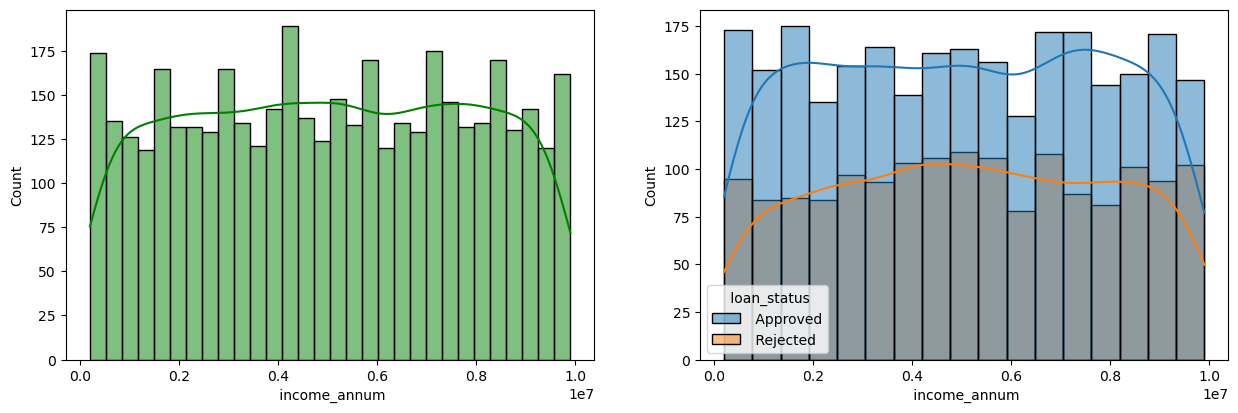

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
plt.subplot(221)
sns.histplot(data=df, x=' income_annum', bins=30, kde=True, color='g')
plt.subplot(222)
sns.histplot(data=df, x=" income_annum", kde=True, hue=' loan_status')
plt.show()

In [72]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

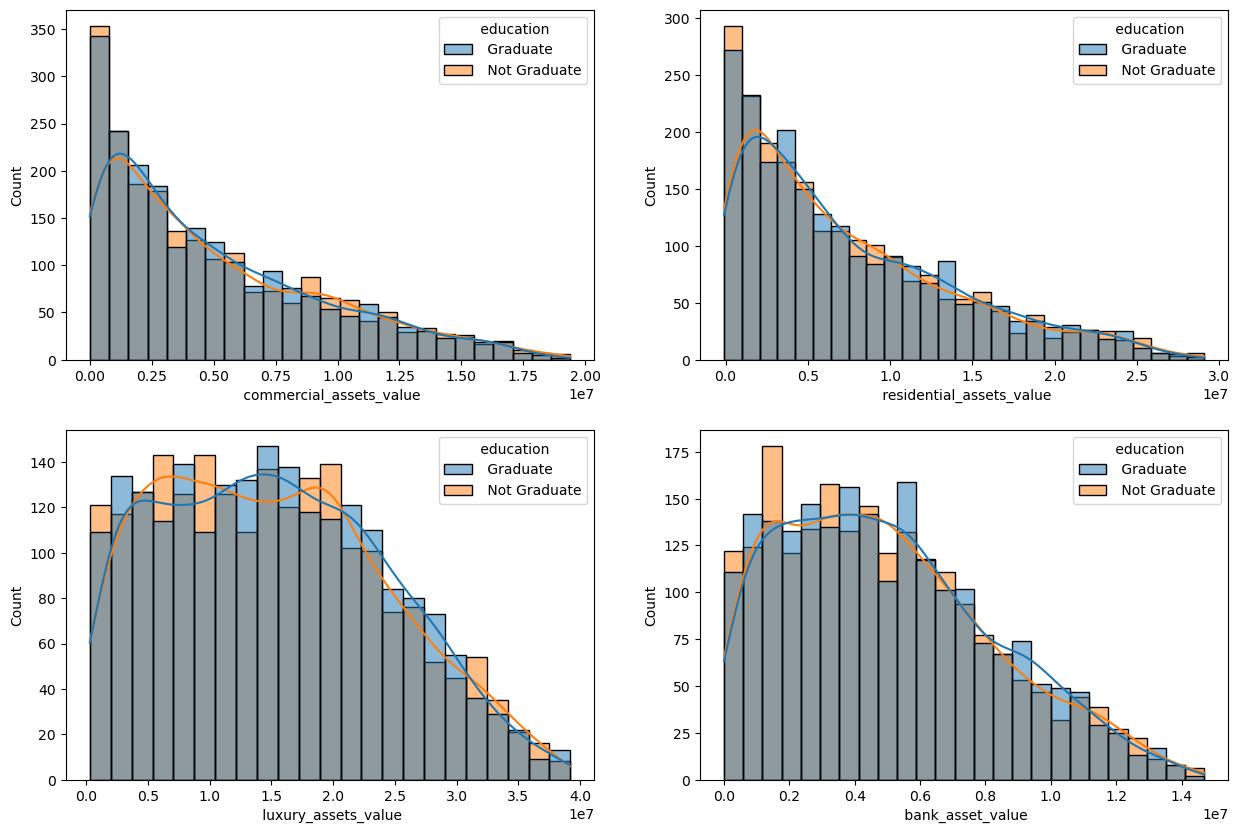

In [73]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plt.subplot(221)
sns.histplot(data=df, x=" commercial_assets_value", kde=True, hue=' education')
plt.subplot(222)
sns.histplot(data=df, x=" residential_assets_value", kde=True, hue=' education')
plt.subplot(223)
sns.histplot(data=df, x=" luxury_assets_value", kde=True, hue=' education')
plt.subplot(224)
sns.histplot(data=df, x=" bank_asset_value", kde=True, hue=' education')
plt.show()

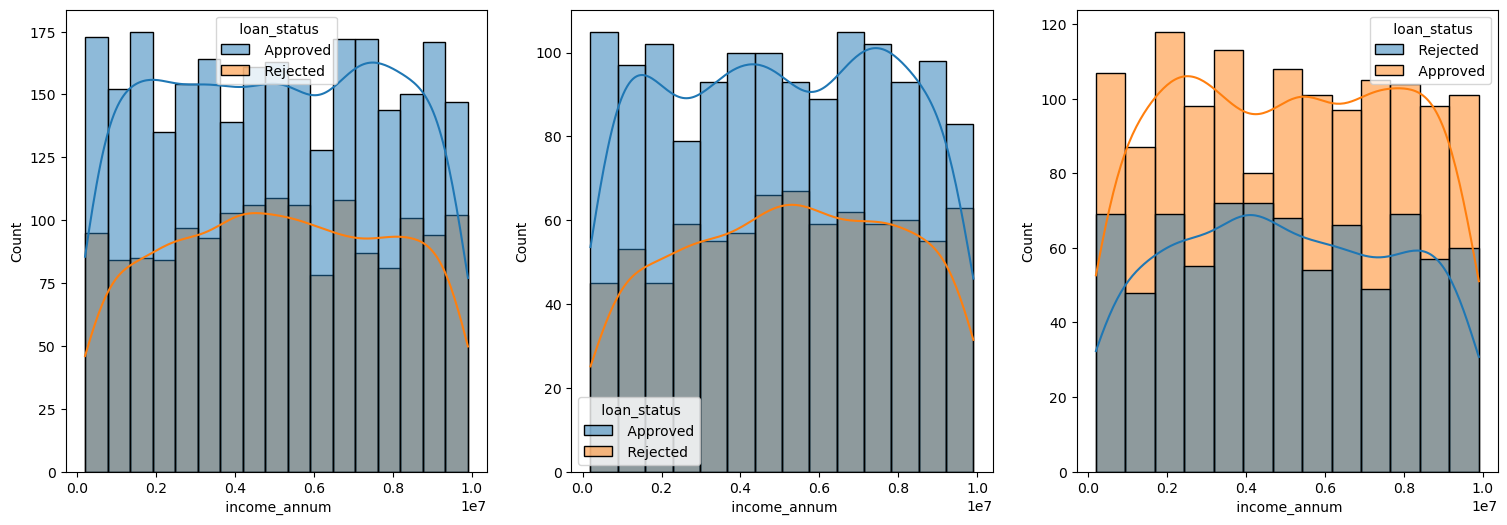

In [81]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x=' income_annum',kde=True,hue=' loan_status')
plt.subplot(142)
sns.histplot(data=df[df[' education']==' Graduate'],x=' income_annum',kde=True,hue=' loan_status')
plt.subplot(143)
sns.histplot(data=df[df[' education']==' Not Graduate'],x=' income_annum',kde=True,hue=' loan_status')
plt.show()

In [82]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

## Outliers

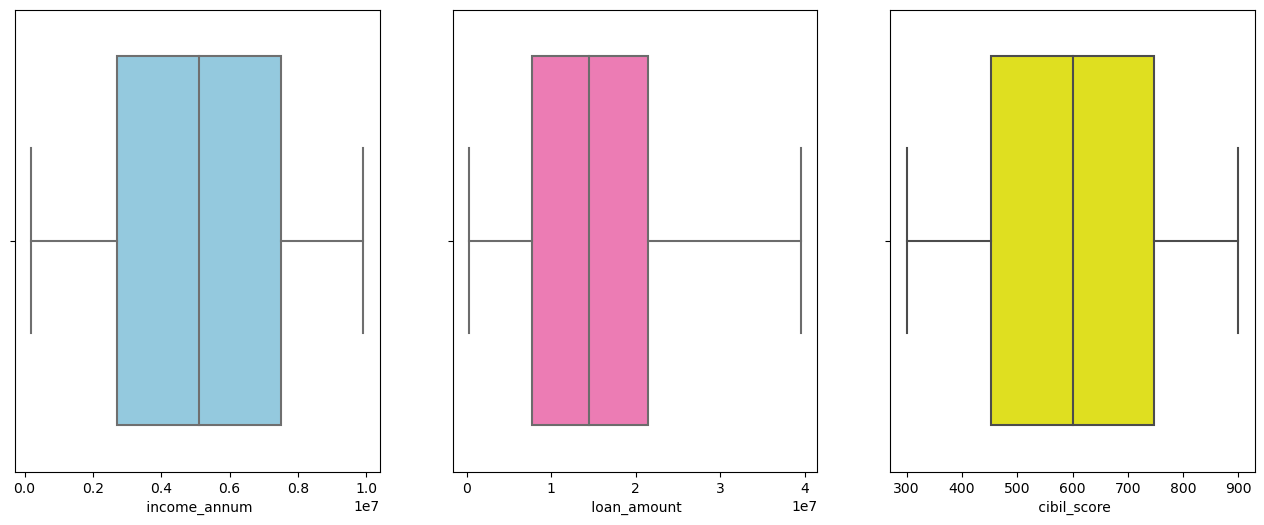

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

sns.boxplot(data=df, x=' income_annum', color='skyblue', ax=axes[0])
sns.boxplot(data=df, x=' loan_amount', color='hotpink', ax=axes[1])
sns.boxplot(data=df, x=' cibil_score', color='yellow', ax=axes[2])
plt.show()